In [2]:
library(ggplot2)
library(ggrepel)
library(plotly)

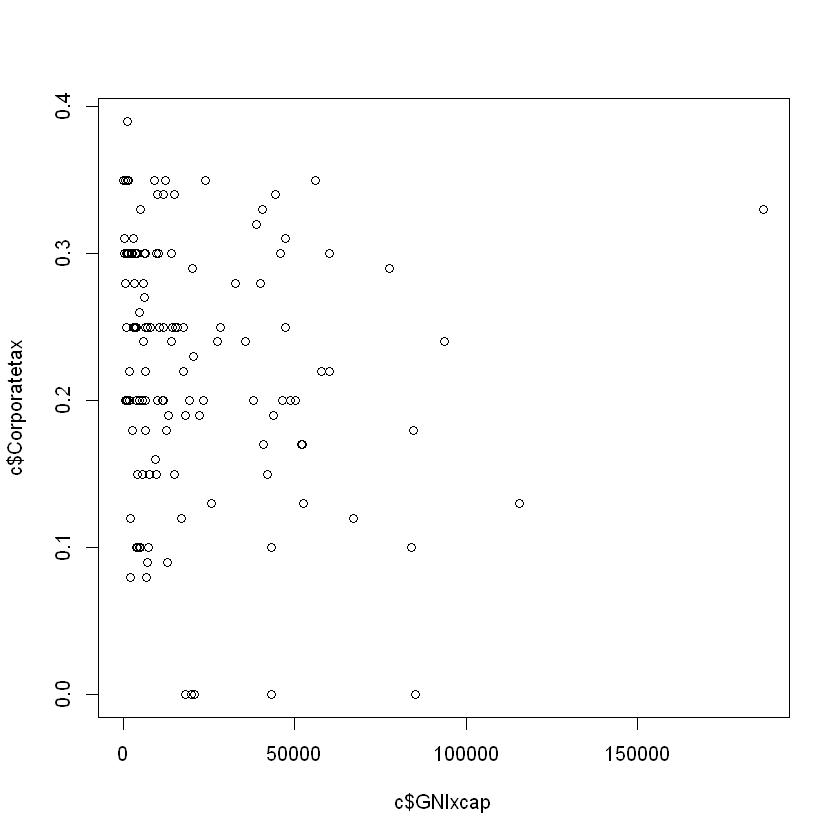

In [4]:
c=read.table("datir.csv", header=TRUE, sep=";", stringsAsFactors=FALSE)
c$GNIxcap<-gsub(",",".",c$GNIxcap)
c$Corporatetax<-gsub(",",".",c$Corporatetax)
c$GNIxcap<-as.numeric(c$GNIxcap)
c$Corporatetax<-as.numeric(c$Corporatetax)
plot(c$GNIxcap,c$Corporatetax)

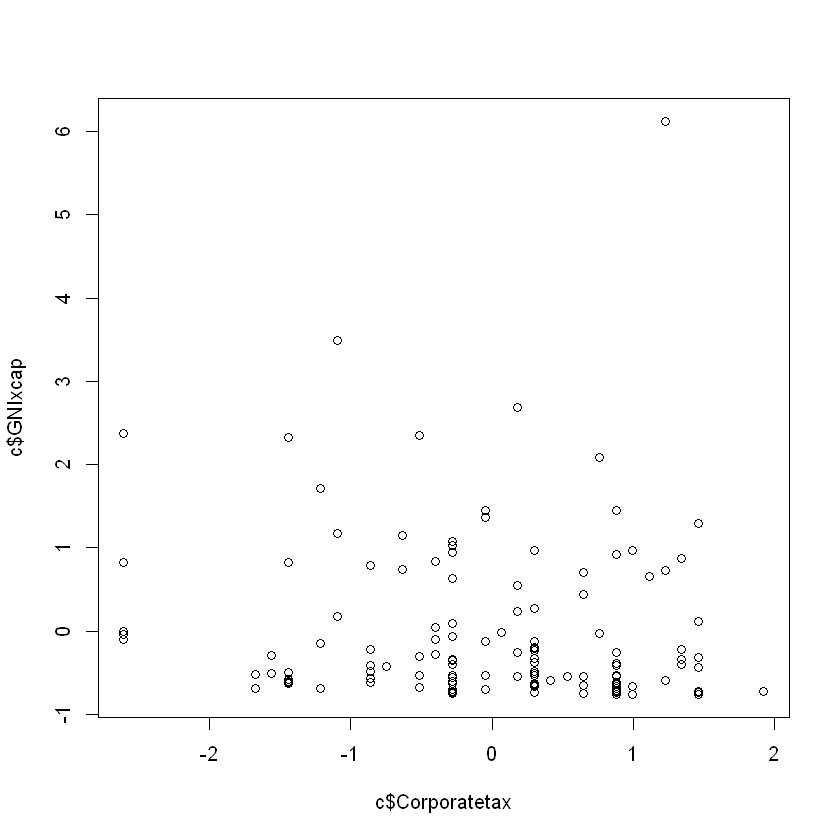

In [7]:
c$Corporatetax<-scale(c$Corporatetax)
c$GNIxcap<-scale(c$GNIxcap)
plot(c$Corporatetax,c$GNIxcap)

In [9]:
kmax = 15 # the maximum number of clusters we will examine; you can change this
totwss = rep(0,kmax) # will be filled with total sum of within group sum squares
kmfit = list() # create and empty list


Corporatetax,GNIxcap
-0.51546706,2.349490843
-0.28329030,-0.751703074
-0.86373221,-0.616113585
0.41323998,-0.595054727
-1.44417411,0.824386186
0.87759350,-0.619808122
1.45803541,-0.314269955
-0.28329030,-0.630891731
0.29715160,-0.208236758
0.87759350,1.444329406


In [14]:
for (i in 1:kmax){
kclus = kmeans(subset(c, select=c("Corporatetax", "GNIxcap")),centers=i,iter.max=20)
totwss[i] = kclus$tot.withinss
kmfit[[i]] = kclus
}

In [21]:
n = nrow(subset(c, select=c("Corporatetax", "GNIxcap")))
n

[1] 134

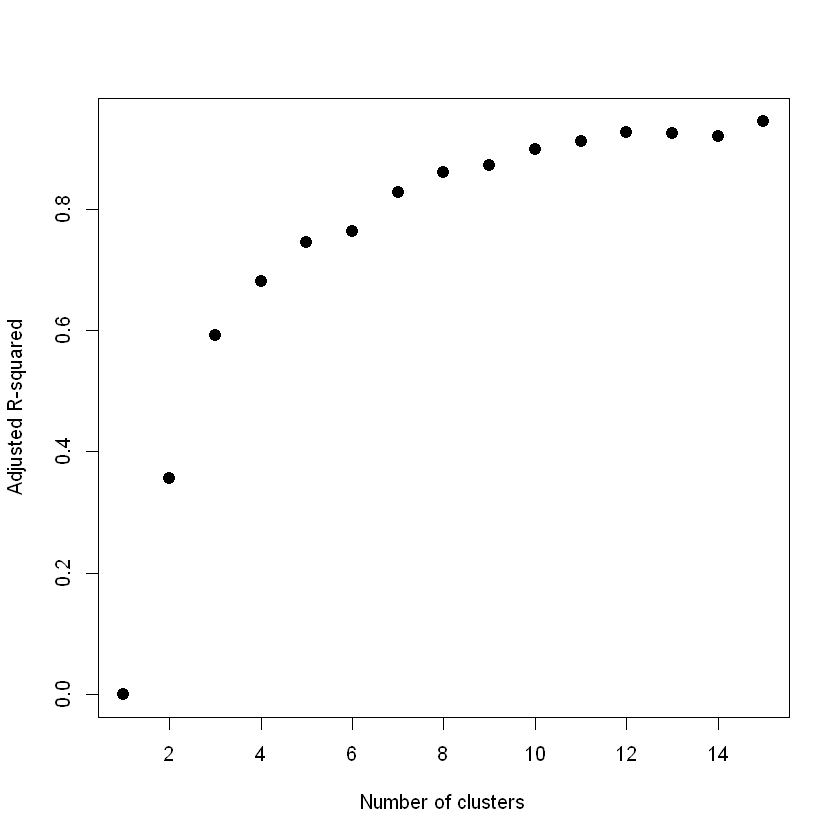

In [22]:

rsq = 1-(totwss*(n-1))/(totwss[1]*(n-seq(1,kmax)))

plot(seq(1,kmax),rsq,xlab="Number of clusters",ylab="Adjusted R-squared",pch=20,cex=2)

In [103]:
Cluster <- kmeans(subset(mtcars, select=c("Corporatetax", "GNIxcap")), 5, nstart = 20)
Cluster

K-means clustering with 5 clusters of sizes 21, 1, 17, 43, 52

Cluster means:
  Corporatetax    GNIxcap
1   -0.4878270  1.5131885
2    1.2258586  6.1238293
3   -1.7104945 -0.2420744
4    1.0449768 -0.2980655
5   -0.1314824 -0.4032443

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   5   5   5   3   4   4   5   5   1   1   5   3   3   4   5   5   4   4   4 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  5   3   5   4   1   3   4   4   5   4   4   5   4   5   5   5   4   5   4   3 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  5   1   4   5   5   4   3   1   4   4   4   5   4   4   5   4   1   3   1   4 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  5   5   1   1   5   4   4   4   5   5   4   1   5   5   1   4   1   1   3   5 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  3   4   5   4  

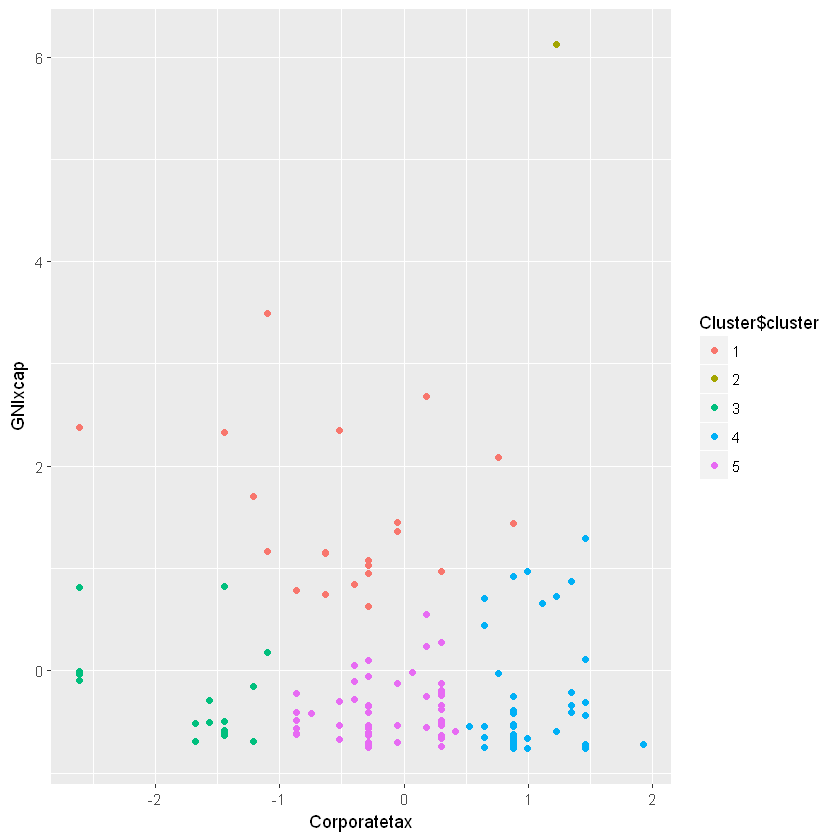

In [104]:
Cluster$cluster <- as.factor(Cluster$cluster)
ggplot(subset(mtcars, select=c("Corporatetax", "GNIxcap")), aes(Corporatetax, GNIxcap, color = Cluster$cluster)) + geom_point()

In [110]:
write.csv2(file="ciccino.csv", x=data.frame(mtcars$Country, mtcars$Corporatetax, mtcars$GNIxcap, Cluster$cluster), row.names = FALSE)